In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, f_oneway
import pingouin as pg
from statsmodels.stats import oneway
%matplotlib widget

In [4]:
control_wet_biomass = pd.read_csv('wet_biomass_data/control.csv')
cd_wet_biomass = pd.read_csv('wet_biomass_data/cd.csv')
ni_wet_biomass = pd.read_csv('wet_biomass_data/ni.csv')
zn_wet_biomass = pd.read_csv('wet_biomass_data/zn.csv')

<h1 style='text-align:center'>Wet Biomass Analysis</h1>

<h2>Cadmium<h2>

In [5]:
cd_pooled = [cd_wet_biomass[col] for col in cd_wet_biomass]

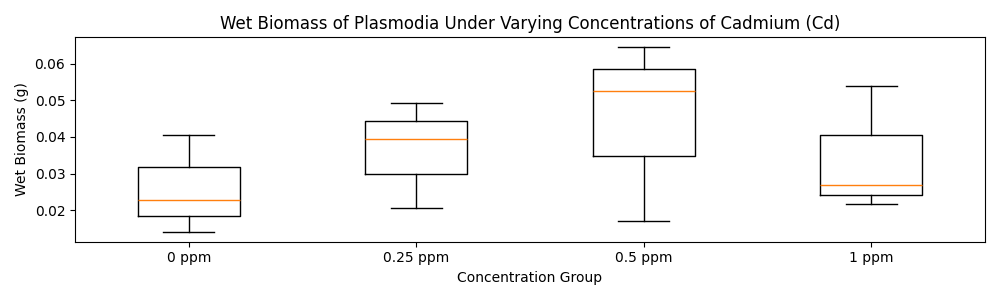

In [6]:
cd_box, axis = plt.subplots(1,1, figsize=(10,3))
axis.boxplot(x=cd_pooled)
axis.set(xticklabels=['0 ppm', '0.25 ppm', '0.5 ppm', '1 ppm'],
         title='Wet Biomass of Plasmodia Under Varying Concentrations of Cadmium (Cd)',
         xlabel='Concentration Group',
         ylabel='Wet Biomass (g)')

cd_box.tight_layout()

<h3>Statistical Analysis</h3>

In [7]:
alpha=0.05

<h4>Test for Normality (Shapiro-Wilk Test)</h4>

In [34]:
for group, wet_biomass in zip(['0', '0.25', '0.5', '1'], cd_pooled):
    s_normal = True
    shapiro_test = shapiro(wet_biomass, nan_policy='omit')
    if shapiro_test.pvalue < alpha: s_normal = False

    print(f'Group: {group}\t Normal: {s_normal} \t Statistic: {shapiro_test.statistic:.2f} \t p-Value: {shapiro_test.pvalue:.2f}')

Group: 0	 Normal: True 	 Statistic: 0.97 	 p-Value: 0.64
Group: 0.25	 Normal: True 	 Statistic: 0.97 	 p-Value: 0.65
Group: 0.5	 Normal: True 	 Statistic: 0.93 	 p-Value: 0.48
Group: 1	 Normal: True 	 Statistic: 0.87 	 p-Value: 0.29


<h3>Test for Homogeneity of Variances (Levene's Test)</h3>

In [27]:
levene_test = levene(*cd_pooled, nan_policy='omit')
l_homo_var = True
if levene_test.pvalue < alpha: l_homo_var = False

print(f'Groups Analyzed: 0, 0.25. 0.5, 1 \t Homoscedasticity: {l_homo_var} \t Statistic: {levene_test.statistic:.2f} \t p-Value: {levene_test.pvalue:.2f}')

Groups Analyzed: 0, 0.25. 0.5, 1 	 Homoscedasticity: True 	 Statistic: 0.17 	 p-Value: 0.91


<h3>Group Comparison (One-Way ANOVA)</h3>

In [37]:
anova_test = f_oneway(*cd_pooled)
anova_sig_dif = False
if anova_test.pvalue < alpha: anova_sig_dif = True
print(f'Groups Analyzed: 0, 0.25. 0.5, 1 \t Significant Difference: {anova_sig_dif} \t Statistic: {anova_test.statistic:.2f} \t p-Value: {anova_test.pvalue:.2f}')


Groups Analyzed: 0, 0.25. 0.5, 1 	 Significant Difference: False 	 Statistic: 0.56 	 p-Value: 0.66


<h2>Nickel</h2>

In [11]:
ni_pooled = [ni_wet_biomass[col] for col in ni_wet_biomass]

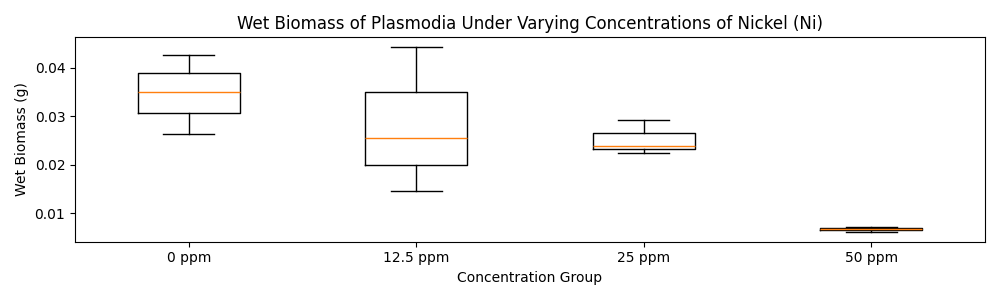

In [12]:
ni_box, axis = plt.subplots(1,1, figsize=(10,3))
axis.boxplot(x=ni_pooled)
axis.set(xticklabels=['0 ppm', '12.5 ppm', '25 ppm', '50 ppm'],
         title='Wet Biomass of Plasmodia Under Varying Concentrations of Nickel (Ni)',
         xlabel='Concentration Group',
         ylabel='Wet Biomass (g)')

ni_box.tight_layout()

<h3>Statistical Analysis</h3>

In [13]:
alpha=0.05

<h4>Test for Normality (Shapiro-Wilk Test)</h4>

In [35]:
for group, wet_biomass in zip(['0', '12.5', '25', '50'], ni_pooled):
    s_normal = True
    shapiro_test = shapiro(wet_biomass, nan_policy='omit')
    if shapiro_test.pvalue < alpha: s_normal = False

    print(f'Group: {group}\t Normal: {s_normal} \t Statistic: {shapiro_test.statistic:.2f} \t p-Value: {shapiro_test.pvalue:.2f}')


Group: 0	 Normal: True 	 Statistic: 1.00 	 p-Value: 0.94
Group: 12.5	 Normal: True 	 Statistic: 0.98 	 p-Value: 0.71
Group: 25	 Normal: True 	 Statistic: 0.90 	 p-Value: 0.38
Group: 50	 Normal: True 	 Statistic: 0.96 	 p-Value: 0.64


<h3>Test for Homogeneity of Variances (Levene's Test)</h3>

In [36]:
levene_test = levene(*ni_pooled, nan_policy='omit')
l_homo_var = True
if levene_test.pvalue < alpha: l_homo_var = False

print(f'Groups Analyzed: 0, 12.5, 25, 50 \t Homoscedasticity: {l_homo_var} \t Statistic: {levene_test.statistic:.2f} \t p-Value: {levene_test.pvalue:.2f}')

Groups Analyzed: 0, 12.5, 25, 50 	 Homoscedasticity: True 	 Statistic: 1.75 	 p-Value: 0.23


<h3>Group Comparison (One-Way ANOVA)</h3>

In [39]:
anova_test = f_oneway(*ni_pooled)
anova_sig_dif = False
if anova_test.pvalue < alpha: anova_sig_dif = True
print(f'Groups Analyzed: 0, 12.5, 25, 50 \t Significant Difference: {anova_sig_dif} \t Statistic: {anova_test.statistic:.2f} \t p-Value: {anova_test.pvalue:.2f}')

Groups Analyzed: 0, 12.5, 25, 50 	 Significant Difference: True 	 Statistic: 5.62 	 p-Value: 0.02


<h3>Pairwise Comparison (Games-Howell Post-Hoc Test)</h3>

In [41]:
ni_wet_biomass_long = ni_wet_biomass.melt(var_name = 'Concentration', value_name = 'Wet Biomass')

In [44]:
tukey_test = pg.pairwise_tukey(data=ni_wet_biomass_long, dv='Wet Biomass', between='Concentration')
tukey_test['sig_diff'] = tukey_test['p-tukey'].apply(lambda x: 'True' if x < alpha else 'False')

In [45]:
tukey_test

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges,sig_diff
0,Control_2_wet,Ni_12_5_wet,0.034700,0.028133,0.006567,0.007165,0.916443,0.797169,0.432411,False
1,Control_2_wet,Ni_25_wet,0.034700,0.025200,0.009500,0.007165,1.325818,0.573432,1.209400,False
2,Control_2_wet,Ni_50_wet,0.034700,0.006667,0.028033,0.007165,3.912326,0.018739,3.878696,True
3,Ni_12_5_wet,Ni_25_wet,0.028133,0.025200,0.002933,0.007165,0.409375,0.975314,0.213690,False
4,Ni_12_5_wet,Ni_50_wet,0.028133,0.006667,0.021467,0.007165,2.995884,0.066902,1.604646,False
5,Ni_25_wet,Ni_50_wet,0.025200,0.006667,0.018533,0.007165,2.586508,0.119127,5.846309,False


<h2>Zinc<h2>

In [20]:
zn_pooled = [zn_wet_biomass[col] for col in zn_wet_biomass]

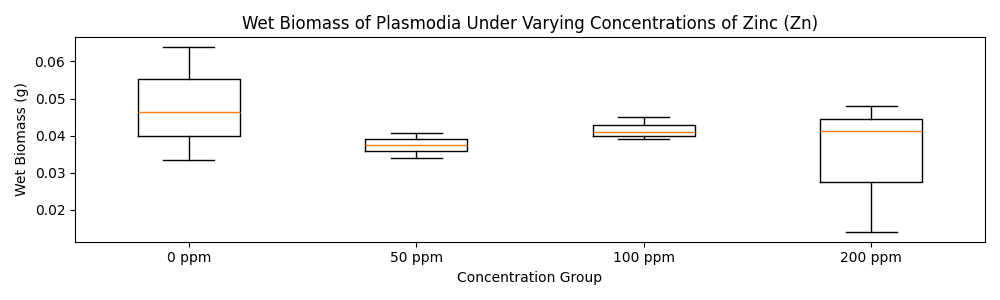

In [21]:
zn_box, axis = plt.subplots(1,1, figsize=(10,3))
axis.boxplot(x=zn_pooled)
axis.set(xticklabels=['0 ppm', '50 ppm', '100 ppm', '200 ppm'],
         title='Wet Biomass of Plasmodia Under Varying Concentrations of Zinc (Zn)',
         xlabel='Concentration Group',
         ylabel='Wet Biomass (g)')

zn_box.tight_layout()

<h3>Statistical Analysis</h3>

In [22]:
alpha=0.05

<h4>Test for Normality (Shapiro-Wilk Test)</h4>

In [23]:
for group, wet_biomass in zip(['0', '50', '100', '200'], zn_pooled):
    s_normal = False
    shapiro_test = shapiro(wet_biomass, nan_policy='omit')
    if shapiro_test.pvalue < alpha: s_normal = True

    print(f'Group: {group}\t Normal: {s_normal} \t Statistic: {shapiro_test.statistic:.2f} \t p-Value: {shapiro_test.pvalue:.2f}')


Group: 0	 Normal: False 	 Statistic: 0.99 	 p-Value: 0.83
Group: 50	 Normal: False 	 Statistic: 1.00 	 p-Value: 0.95
Group: 100	 Normal: False 	 Statistic: 0.96 	 p-Value: 0.60
Group: 200	 Normal: False 	 Statistic: 0.89 	 p-Value: 0.36


<h3>Test for Homogeneity of Variances (Levene's Test)</h3>

In [24]:
levene_test = levene(*zn_pooled, nan_policy='omit')
l_homo_var = False
if levene_test.pvalue < alpha: l_homo_var = True

print(f'Groups Analyzed: 0, 50, 100, 200 \t Homoscedasticity: {l_homo_var} \t Statistic: {levene_test.statistic:.2f} \t p-Value: {levene_test.pvalue:.2f}')

Groups Analyzed: 0, 50, 100, 200 	 Homoscedasticity: False 	 Statistic: 1.03 	 p-Value: 0.43


<h3>Group Comparison (Welch's ANOVA)</h3>

In [25]:
welch_test = oneway.anova_oneway(zn_pooled, use_var='unequal')
w_sig_dif = False
if welch_test.pvalue < alpha: w_sig_dif = True
print(f'Groups Analyzed: 0, 50, 100, 200 \t Significant Difference: {w_sig_dif} \t Statistic: {welch_test.statistic:.2f} \t p-Value: {welch_test.pvalue:.2f}')


Groups Analyzed: 0, 50, 100, 200 	 Significant Difference: False 	 Statistic: 0.93 	 p-Value: 0.50
